# Preprocessing


In [37]:
import pandas as pd 
dataset=pd.read_csv(r"C:\Users\SNB\Desktop\nouveau..csv", sep=";")


def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)



# Training set and Testing set 

In [38]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
#dtree = tree.DecisionTreeClassifier() 



# Decision tree

In [39]:
dtree=tree.DecisionTreeClassifier(criterion = "gini",splitter= 'random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5)
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


# Plot decision tree 

[Text(708.2307692307693, 996.6, 'Sex <= 0.891\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(257.53846153846155, 815.4000000000001, 'Pclass <= 1.847\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(128.76923076923077, 634.2, 'gini = 0.051\nsamples = 10.7%\nvalue = [0.026, 0.974]'),
 Text(386.3076923076923, 634.2, 'Pclass <= 2.591\ngini = 0.466\nsamples = 24.7%\nvalue = [0.369, 0.631]'),
 Text(257.53846153846155, 453.0, 'gini = 0.16\nsamples = 8.0%\nvalue = [0.088, 0.912]'),
 Text(515.0769230769231, 453.0, 'Fare <= 16.336\ngini = 0.5\nsamples = 16.7%\nvalue = [0.504, 0.496]'),
 Text(386.3076923076923, 271.79999999999995, 'PassengerId <= 227.946\ngini = 0.486\nsamples = 11.1%\nvalue = [0.418, 0.582]'),
 Text(257.53846153846155, 90.59999999999991, 'gini = 0.384\nsamples = 3.8%\nvalue = [0.259, 0.741]'),
 Text(515.0769230769231, 90.59999999999991, 'gini = 0.5\nsamples = 7.3%\nvalue = [0.5, 0.5]'),
 Text(643.8461538461538, 271.79999999999995, 'gini = 0.439\ns

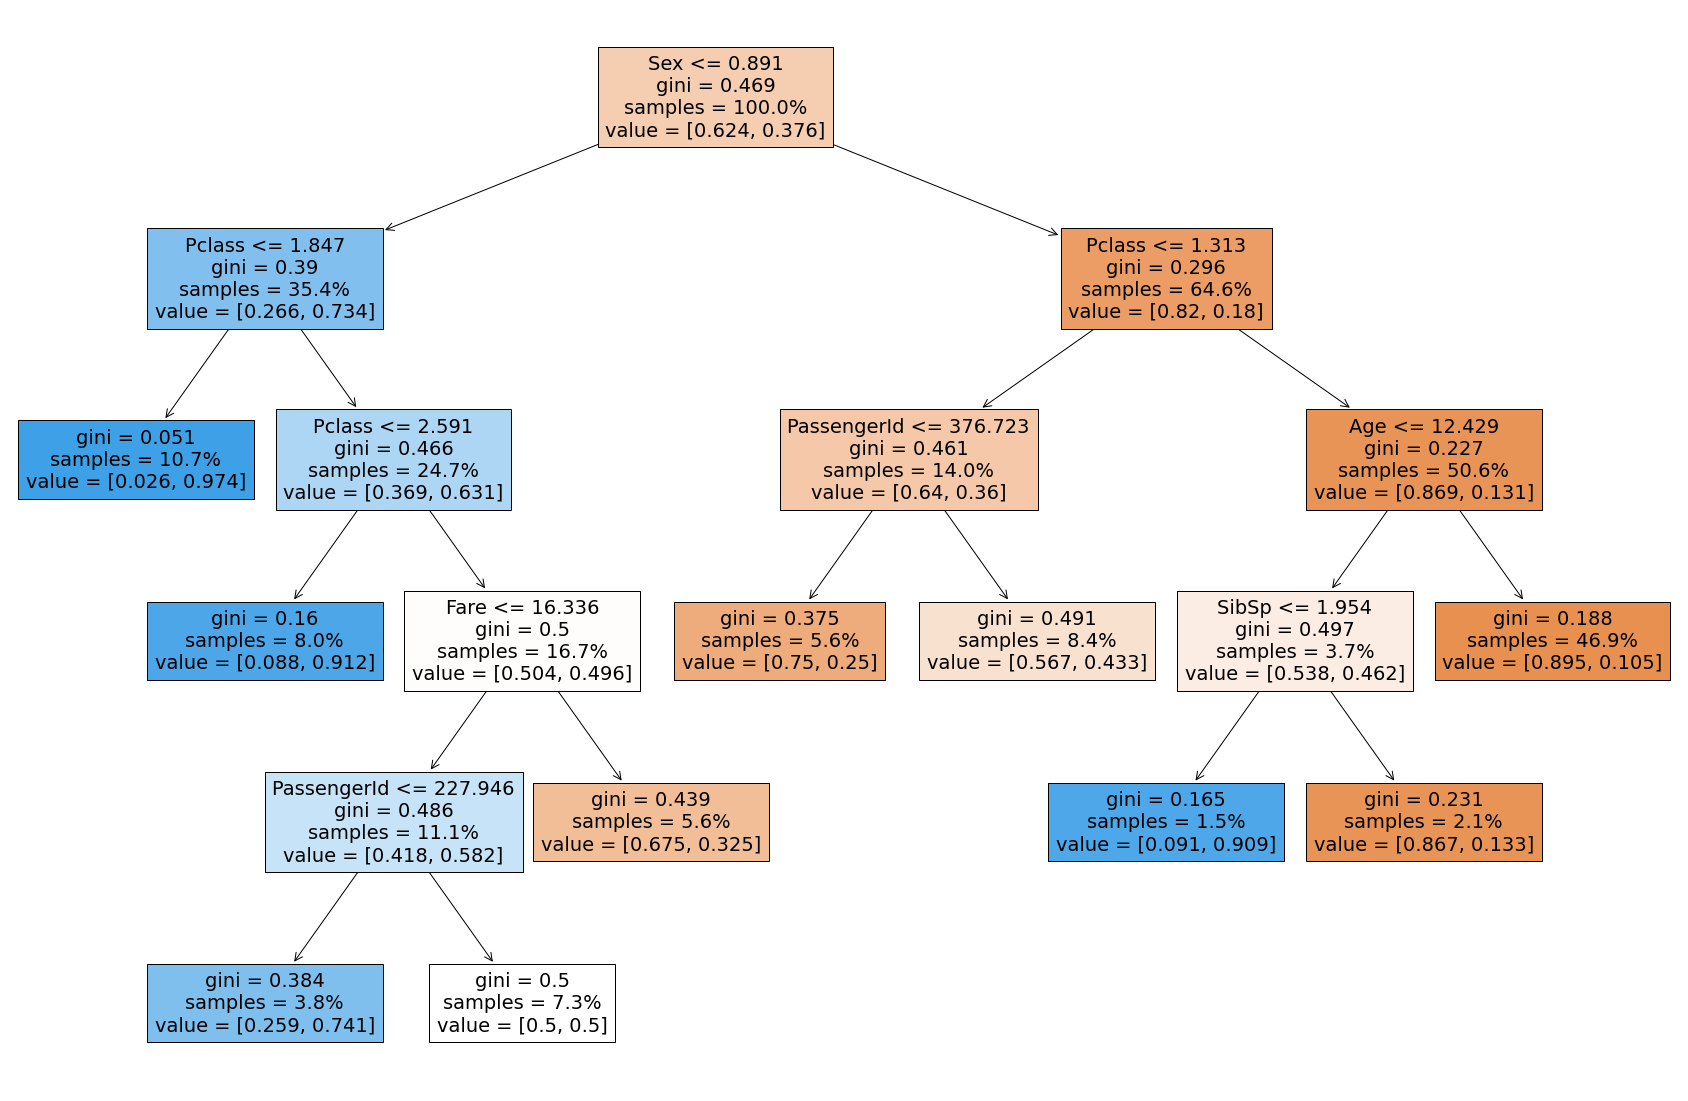

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (30,20))
plot_tree(dtree, filled = True, feature_names = x.columns, proportion = True)

# Change the decision tree parameters

In [41]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Age","Sex"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
#dtree = tree.DecisionTreeClassifier() 

dtree=tree.DecisionTreeClassifier(criterion = "gini",splitter= 'random', max_leaf_nodes=8, min_samples_leaf=10, max_depth=7)
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model


# New accuracy

In [43]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7374301675977654


In [44]:
# the accuracy in the second exemple is less than the first one

# Random forest

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
X=data[['PassengerId', 'Pclass', 'Sex','Age','SibSp','Parch','Fare']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [56]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8544776119402985


# Change the number of estimators

In [57]:
clf=RandomForestClassifier(n_estimators=20) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8768656716417911


In [ ]:
# the accuracy in the second example is more than the first one